In [1]:
import numpy as np
import pandas as pd

import geopy.distance

from sklearn.decomposition import PCA

import shutil
import os

import time
import json

from collections import OrderedDict

In [2]:
from utils.PreProcessor import PreProcessor
preprocessor = PreProcessor(sample_num = 1, preprocess_all_raw_data = True)

tier_1_2_cities_raw = [
    'Ahmedabad', 'Bengaluru', 'Mumbai', 'Pune', 'Chennai', 'Hyderabad', 'Kolkata', 'Delhi', 'Visakhapatnam', 'Guwahati', 'Patna',
    'Raipur', 'Gurugram', 'Shimla', 'Jamshedpur', 'Thiruvananthapuram', 'Bhopal', 'Bhubaneswar', 'Amritsar', 'Jaipur', 'Lucknow', 'Dehradun'
]
tier_1_2_cities_raw = tier_1_2_cities_raw + (
    "Guntur, Kakinada, Kurnool, Nellore, Rajamahendravaram, Vijayawada".split(', ')
) + (
    "Bilaspur, Bhilai".split(', ')
) + (
    "Anand, Bhavnagar, Dahod, Jamnagar, Rajkot, Surat, Vadodara".split(', ')
) + (
    "Faridabad, Karnal".split(', ')
) + (
    "Hamirpur".split(', ')
) + (
    "Bokaro Steel City, Dhanbad, Ranchi".split(', ')
) + (
    "Belagavi, Hubballi-Dharwad, Kalaburagi, Mangaluru, Mysuru, Vijayapura".split(', ')
) + (
    "Kannur, Kochi, Kollam, Kozhikode, Malappuram, Thrissur".split(', ')
) + (
    "Gwalior, Indore, Jabalpur, Ratlam, Ujjain".split(', ')
) + (
    "Amravati, Aurangabad, Bhiwandi, Dombivli, Jalgaon, Kolhapur, Nagpur, Nanded, Nashik, Sangli, Solapur, Vasai-Virar".split(', ')
) + (
    "Cuttack, Rourkela".split(', ')
) + (
    "Jalandhar, Ludhiana".split(', ')
) + (
    "Ajmer, Bikaner, Jodhpur".split(', ')
) + (
    "Coimbatore, Erode, Madurai, Salem, Thanjavur, Tiruchirappalli, Tirunelveli, Tiruvannamalai, Vellore".split(', ')
) + (
    "Warangal".split(', ')
) + (
    "Agra, Aligarh, Bareilly, Ghaziabad, Gorakhpur, Jhansi, Kanpur, Mathura, Meerut, Moradabad, Noida, Prayagraj, Varanasi".split(', ')
) + (
    "Asansol, Berhampore, Burdwan, Durgapur, Purulia, Siliguri".split(', ')
) + (
    "Chandigarh, Jammu, Puducherry, Srinagar".split(', ')
)

**************************************
Converting Raw Datasets into PreProcessed Datasets
Opening AirRouteDatasets - Flights
Opening AirRouteDatasets - Airports
Airports which are included in routes but not in airport list are -
{'AGX'}
Opening International AirRouteDatasets - Flights
Opening AirRouteDatasets - IntlAirports
Airports which are included in routes but not in airport list are -
None
Opening Sample AirRouteDatasets
Opening AirRouteDatasets - Flights
Opening AirRouteDatasets - Airports
Airports which are included in routes but not in airport list are -
{'AGX'}
Opening City-pair wise Domestic Passengers Data
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will

Book 1
Book 1
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Book 1
Book 1
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will

Book 1
Book 1
Book 1
Opening Indian Railways Data
Opening District Centroid Data
Opening Station Codes Data
Opening Indian Railways Data
0 Trains Scanned out of 5208!
500 Trains Scanned out of 5208!
1000 Trains Scanned out of 5208!
1500 Trains Scanned out of 5208!
2000 Trains Scanned out of 5208!
2500 Trains Scanned out of 5208!
3000 Trains Scanned out of 5208!
3500 Trains Scanned out of 5208!
4000 Trains Scanned out of 5208!
4500 Trains Scanned out of 5208!
5000 Trains Scanned out of 5208!
Opening Economic Data
Opening Population, Area & Household Data
Opening Population Trend Data
A-2
A-2 
A-2
A-2
A-2 
A-2 
A-2
 A-2
A-2
A-2
A-2 
A-2
 A-2
ALERT! Found copy district  pratapgarh in states  rajasthan  and  uttar pradesh
A-2 
ALERT! Found copy district  raigarh in states  maharashtra  and  chhattisgarh
A-2 
A-2 
A-2
A-2
ALERT! Found copy district  aurangabad in states  bihar  and  maharashtra
 A-2
ALERT! Found copy district  hamirpur in states  himachal pradesh  and  uttar pradesh
ALERT! 

In [3]:
city_info = {
    'Ahmedabad': 'Located in the western state of Gujarat, known for its textile industry, and emerging as an IT hub.',
    'Bengaluru (Bangalore)': 'Located in the southern state of Karnataka, known as the "Silicon Valley" of India for its thriving IT industry, and also known for its pleasant climate.',
    'Chennai': 'Located in the southern state of Tamil Nadu, known as the "Detroit of India" for its automobile industry, and also known for its rich cultural heritage and cuisine.',
    'Delhi': 'Located in the northern part of India, the capital of the country, known for its historical monuments, political importance, and emerging as a major business hub.',
    'Hyderabad': 'Located in the southern state of Telangana, known as the "City of Pearls" for its historical significance in the pearl trade, and also emerging as a major IT hub.',
    'Kolkata': 'Located in the eastern state of West Bengal, known as the "Cultural Capital" of India for its rich literary, artistic, and cultural heritage, and also known for its historical significance as a major trading port.',
    'Mumbai': 'Located in the western state of Maharashtra, the financial capital of India, known for its Bollywood film industry, and also known for its iconic landmarks such as the Gateway of India and the Marine Drive.',
    'Pune': 'Located in the western state of Maharashtra, known as the "Oxford of the East" for its academic institutions, and also known for its thriving IT industry and pleasant climate.',
    'Agra': 'Located in the northern state of Uttar Pradesh, famous for the iconic Taj Mahal, one of the seven wonders of the world, and also known for its historical significance as a major Mughal empire city.',
    'Ajmer': 'Located in the northern state of Rajasthan, known for the famous Ajmer Sharif Dargah, a popular Muslim pilgrimage site, and also known for its historical significance as a major Mughal empire city.',
    'Akola': 'Located in the western state of Maharashtra, known for its agriculture and textile industries, and also emerging as a major educational hub.',
    'Aligarh': 'Located in the northern state of Uttar Pradesh, known for its famous Aligarh Muslim University, and also known for its historical significance as a major Mughal empire city.',
    'Allahabad': 'Located in the northern state of Uttar Pradesh, known for the famous Kumbh Mela, the largest religious gathering in the world, and also known for its historical significance as a major Mughal empire city.',
    'Amravati': 'Located in the western state of Maharashtra, known for its agriculture and textile industries, and also emerging as a major educational hub.',
    'Amritsar': 'Located in the northern state of Punjab, known for the famous Golden Temple, the most important Sikh pilgrimage site, and also known for its historical significance as a major Mughal empire city.',
    'Asansol': 'Located in the eastern state of West Bengal, known for its coal and steel industries, and also emerging as a major educational and cultural hub.',
    'Aurangabad': 'Located in the western state of Maharashtra, known for the famous Ajanta and Ellora caves, UNESCO World Heritage sites, and also emerging as a major industrial hub.',
    'Bareilly': 'Located in the northern state of Uttar Pradesh, known for its agriculture and textile industries, and also emerging as a major educational hub.',
    'Belgaum': 'Located in the southern state of Karnataka, known for its historic landmarks and cultural heritage, and also emerging as a major industrial and commercial center.',
    'Bhavnagar': 'Located in the western state of Gujarat, known for its shipbuilding and salt industries, and also emerging as a major education and tourism hub.',
    'Bhiwandi': 'Located in the western state of Maharashtra, known for its textile industry, and also emerging as a major warehousing and logistics hub.',
    'Bhopal': 'Located in the central state of Madhya Pradesh, known as the "City of Lakes" for its many natural and man-made lakes, and also emerging as a major educational and industrial hub.',
    'Bhubaneswar': 'Located in the eastern state of Odisha, known as the "Temple City" for its many historic temples, and also emerging as a major IT and education hub.',
    'Bikaner': 'Located in the northern state of Rajasthan, known for its historic forts and palaces, and also emerging as a major center for the food processing industry.',
    'Bilaspur': 'Located in the central state of Chhattisgarh, known for its coal mining industry, and also emerging as a major educational and industrial hub.',
    'Bokaro Steel City': 'Located in the eastern state of Jharkhand, known for its steel industry, and also emerging as a major educational and cultural center.',
    'Chandigarh': 'Located in the northern part of India, known as the "City Beautiful" for its well-planned architecture and green spaces, and also emerging as a major center for IT and education.',
    'Coimbatore': 'Located in the southern state of Tamil Nadu, known for its textile and engineering industries, and also emerging as a major center for IT and education.',
    'Cuttack': 'Located in the eastern state of Odisha, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Dehradun': 'Located in the northern state of Uttarakhand, known for its natural beauty and pleasant climate, and also emerging as a major center for education and tourism.',
    'Dhanbad': 'Located in the eastern state of Jharkhand, known for its coal mining industry, and also emerging as a major center for education and research.',
    'Durgapur': 'Located in the eastern state of West Bengal, known for its steel industry and also emerging as a major education and healthcare center.',
    'Erode': 'Located in the southern state of Tamil Nadu, known for its textile and agriculture industries, and also emerging as a major center for education and healthcare.',
    'Faridabad': 'Located in the northern state of Haryana, known for its industrial and commercial activities, and also emerging as a major center for education and healthcare.',
    'Firozabad': 'Located in the northern state of Uttar Pradesh, known for its glass and bangle industries, and also emerging as a major center for education and tourism.',
    'Ghaziabad': 'Located in the northern state of Uttar Pradesh, a part of the National Capital Region (NCR) and known for its industries, and also emerging as a major center for education and healthcare.',
    'Gorakhpur': 'Located in the northern state of Uttar Pradesh, known for its cultural heritage and religious significance, and also emerging as a major center for education and healthcare.',
    'Gulbarga': 'Located in the southern state of Karnataka, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Guntur': 'Located in the southern state of Andhra Pradesh, known for its agriculture and textile industries, and also emerging as a major center for education and healthcare.',
    'Gurgaon': 'Located in the northern state of Haryana, a part of the National Capital Region (NCR) and known for its industries, and also emerging as a major center for education and healthcare.',
    'Guwahati': 'Located in the northeastern state of Assam, known for its natural beauty and rich biodiversity, and also emerging as a major center for education and tourism.',
    'Gwalior': 'Located in the central state of Madhya Pradesh, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Hubli-Dharwad': 'Located in the southern state of Karnataka, known for its industries and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Indore': 'Located in the central state of Madhya Pradesh, known for its commercial and cultural activities, and also emerging as a major center for education and research.',
    'Jabalpur': 'Located in the central state of Madhya Pradesh, known for its natural beauty and historic landmarks, and also emerging as a major center for education and healthcare.',
    'Jaipur': 'Located in the northern state of Rajasthan, known as the Pink City for its iconic pink-hued buildings, and also emerging as a major center for tourism and education.',
    'Jalandhar': 'Located in the northern state of Punjab, known for its sports industry and also emerging as a major center for education and healthcare.',
    'Jammu': 'Located in the northern state of Jammu and Kashmir, known for its scenic beauty and religious significance, and also emerging as a major center for education and tourism.',
    'Jamnagar': 'Located in the western state of Gujarat, known for its oil refineries and also emerging as a major center for education and healthcare.',
    'Jamshedpur': 'Located in the eastern state of Jharkhand, known for its steel industry and also emerging as a major center for education and healthcare.',
    'Jhansi': 'Located in the central state of Uttar Pradesh, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Jodhpur': 'Located in the northern state of Rajasthan, known for its historic landmarks and cultural heritage, and also emerging as a major center for tourism and education.',
    'Kakinada': 'Located in the southern state of Andhra Pradesh, known for its agriculture and fishing industries, and also emerging as a major center for education and healthcare.',
    'Kannur': 'Located in the southern state of Kerala, known for its natural beauty and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Karnal': 'Located in the northern state of Haryana, known for its agricultural and industrial activities, and also emerging as a major center for education and healthcare.',
    'Kolhapur': 'Located in the western state of Maharashtra, known for its agriculture and leather industries, and also emerging as a major center for education and healthcare.',
    'Kollam': 'Located in the southern state of Kerala, known for its natural beauty and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Kozhikode': 'Located in the southern state of Kerala, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Kurnool': 'Located in the southern state of Andhra Pradesh, known for its historic landmarks and natural beauty, and also emerging as a major center for education and healthcare.',
    'Kurukshetra': 'Located in the northern state of Haryana, known for its religious significance and historic landmarks, and also emerging as a major center for education and healthcare.',
    'Latur': 'Located in the western state of Maharashtra, known for its agriculture and education sectors, and also emerging as a major center for healthcare.',
    'Lucknow': 'Located in the northern state of Uttar Pradesh, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Ludhiana': 'Located in the northern state of Punjab, known for its industrial activities and also emerging as a major center for education and healthcare.',
    'Madurai': 'Located in the southern state of Tamil Nadu, known for its cultural heritage and religious significance, and also emerging as a major center for education and healthcare.',
    'Mangalore': 'Located in the southern state of Karnataka, known for its coastal beauty and educational institutions, and also emerging as a major center for healthcare.',
    'Mathura': 'Located in the northern state of Uttar Pradesh, known for its religious significance and historic landmarks, and also emerging as a major center for education and healthcare.',
    'Meerut': 'Located in the northern state of Uttar Pradesh, known for its industrial activities and educational institutions, and also emerging as a major center for healthcare.',
    'Moradabad': 'Located in the northern state of Uttar Pradesh, known for its brass industry and educational institutions, and also emerging as a major center for healthcare.',
    'Mysore': 'Located in the southern state of Karnataka, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Nagercoil': 'Located in the southern state of Tamil Nadu, known for its natural beauty and educational institutions, and also emerging as a major center for healthcare.',
    'Nashik': 'Located in the western state of Maharashtra, known for its wineries and religious significance, and also emerging as a major center for education and healthcare.',
    'Nellore': 'Located in the southern state of Andhra Pradesh, known for its agricultural activities and educational institutions, and also emerging as a major center for healthcare.',
    'Panipat': 'Located in the northern state of Haryana, known for its historic landmarks and textile industry, and also emerging as a major center for education and healthcare.',
    'Patiala': 'Located in the northern state of Punjab, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Patna': 'Located in the eastern state of Bihar, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Puducherry': 'Located in the southern state of Tamil Nadu, known for its natural beauty and French heritage, and also emerging as a major center for education and healthcare.',
    'Pune': 'Located in the western state of Maharashtra, known for its educational institutions and IT industry, and also emerging as a major center for healthcare.',
    'Raipur': 'Located in the central state of Chhattisgarh, known for its industrial activities and educational institutions, and also emerging as a major center for healthcare.',
    'Rajahmundry': 'Located in the southern state of Andhra Pradesh, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Rajkot': 'Located in the western state of Gujarat, known for its industrial activities and educational institutions, and also emerging as a major center for healthcare.',
    'Ranchi': 'Located in the eastern state of Jharkhand, known for its natural beauty and mineral resources, and also emerging as a major center for education and healthcare.',
    'Salem': 'Located in the southern state of Tamil Nadu, known for its agricultural activities and educational institutions, and also emerging as a major center for healthcare.',
    'Sangli': 'Located in the western state of Maharashtra, known for its agricultural activities and educational institutions, and also emerging as a major center for healthcare.',
    'Shillong': 'Located in the northeastern state of Meghalaya, known for its natural beauty and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Shimla': 'Located in the northern state of Himachal Pradesh, known for its scenic beauty and tourism industry, and also emerging as a major center for education and healthcare.',
    'Siliguri': 'Located in the northeastern state of West Bengal, known for its strategic location and emerging as a major center for trade and commerce.',
    'Solapur': 'Located in the western state of Maharashtra, known for its textile industry and educational institutions, and also emerging as a major center for healthcare.',
    'Srinagar': 'Located in the northern state of Jammu and Kashmir, known for its natural beauty and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Surat': 'Located in the western state of Gujarat, known for its diamond and textile industries, and also emerging as a major center for education and healthcare.',
    'Thane': 'Located in the western state of Maharashtra, known for its proximity to Mumbai and also emerging as a major center for education and healthcare.',
    'Thiruvananthapuram': 'Located in the southern state of Kerala, known for its natural beauty, cultural heritage, and also emerging as a major center for technology and healthcare.',
    'Thrissur': 'Located in the southern state of Kerala, known for its cultural heritage and educational institutions, and also emerging as a major center for healthcare.',
    'Tiruchirappalli': 'Located in the southern state of Tamil Nadu, known for its industrial activities and educational institutions, and also emerging as a major center for healthcare.',
    'Tirunelveli': 'Located in the southern state of Tamil Nadu, known for its natural beauty, educational institutions, and also emerging as a major center for healthcare.',
    'Tirupati': 'Located in the southern state of Andhra Pradesh, known for its religious significance and tourism industry, and also emerging as a major center for education and healthcare.',
    'Ujjain': 'Located in the central state of Madhya Pradesh, known for its cultural heritage and religious significance, and also emerging as a major center for education and healthcare.',
    'Vadodara': 'Located in the western state of Gujarat, known for its industrial activities, educational institutions, and also emerging as a major center for healthcare.',
    'Varanasi': 'Located in the northern state of Uttar Pradesh, known for its religious significance, cultural heritage, and also emerging as a major center for education and healthcare.',
    'Vijayanagaram': 'Located in the southern state of Andhra Pradesh, known for its historical significance and educational institutions, and also emerging as a major center for healthcare.',
    'Thanjavur': 'Located in the southern state of Tamil Nadu, known for its cultural heritage, temple architecture, and agriculture, and also emerging as a major center for education and tourism.',
    'Kochi': 'Located in the southern state of Kerala, known for its natural beauty, cultural heritage, and also emerging as a major center for technology and healthcare.',
    'Purulia': 'Located in the eastern state of West Bengal, known for its natural beauty, tribal culture, and also emerging as a major center for education and healthcare.',
    'Bengaluru': 'Located in the southern state of Karnataka, known as the "Silicon Valley of India" due to its prominence in the technology industry, and also emerging as a major center for education and healthcare.',
    'Prayagraj': 'Located in the northern state of Uttar Pradesh, known for its religious significance and historical importance, and also emerging as a major center for education and healthcare.',
    'Vijayawada': 'Located in the southern state of Andhra Pradesh, known for its location on the banks of the Krishna river, cultural heritage, and also emerging as a major center for education and healthcare.',
    'Hubballi-Dharwad': 'Located in the southern state of Karnataka, known for its educational institutions and industries such as agriculture, textiles, and manufacturing.',
    'Ratlam': 'Located in the central state of Madhya Pradesh, known for its industries such as chemicals, textiles, and manufacturing, and also emerging as a major center for healthcare.',
    'Visakhapatnam': 'Located in the southern state of Andhra Pradesh, known for its natural beauty, port and naval base, and also emerging as a major center for education and healthcare.',
    'Warangal': 'Located in the southern state of Telangana, known for its historical significance and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Mangaluru': 'Located in the southern state of Karnataka, known for its port, beaches, and educational institutions, and also emerging as a major center for healthcare.',
    'Mysuru': 'Located in the southern state of Karnataka, known for its cultural heritage, palaces, and educational institutions, and also emerging as a major center for healthcare.',
    'Jalgaon': 'Located in the western state of Maharashtra, known for its educational institutions, industries such as agriculture and textiles, and also emerging as a major center for healthcare.',
    'Tiruvannamalai': 'Located in the southern state of Tamil Nadu, known for its religious significance, natural beauty, and educational institutions, and also emerging as a major center for healthcare.',
    'Nanded': 'Located in the western state of Maharashtra, known for its religious significance and educational institutions, and also emerging as a major center for healthcare.',
    'Malappuram': 'Located in the southern state of Kerala, known for its educational institutions and natural beauty, and also emerging as a major center for healthcare.',
    'Belagavi': 'Located in the southern state of Karnataka, known for its educational institutions, industries such as manufacturing and textiles, and also emerging as a major center for healthcare.',
    'Rourkela': 'Located in the eastern state of Odisha, known for its steel industry, educational institutions, and also emerging as a major center for healthcare.',
    'Noida': 'Located in the northern state of Uttar Pradesh, known for its proximity to the national capital of Delhi, and also emerging as a major center for technology and healthcare.',
    "Bhilai": "Bhilai is a city located in the state of Chhattisgarh. It is known for its steel industry and is home to the Bhilai Steel Plant, which is one of the largest steel plants in India.",
    "Burdwan": "Burdwan is a city located in the state of West Bengal. It is known for its historical and cultural significance and has several famous temples and monuments, including the 108 Shiva Temple and the Burdwan Palace.",
    "Dahod": "Dahod is a city located in the state of Gujarat. It is known for its natural beauty and is surrounded by hills and forests. The city is also home to several historical sites and monuments, including the Jami Masjid and the Bhamaiya Kund.",
    "Vellore": "Vellore is a city located in the state of Tamil Nadu. It is known for its rich cultural heritage and is home to several historical sites and monuments, including the Vellore Fort and the Jalakandeswarar Temple.",
    "Gurugram": "Gurugram, also known as Gurgaon, is a city located in the state of Haryana. It is known for its thriving IT and finance industries and is home to several multinational corporations, including Google, Microsoft, and IBM.",
    "Dombivli": "Dombivli is a city located in the state of Maharashtra. It is known for its industrial and economic growth and is home to several manufacturing companies, including the Tata Group and Siemens.",
    "Rajamahendravaram": "Rajamahendravaram, also known as Rajahmundry, is a city located in the state of Andhra Pradesh. It is known for its historical and cultural significance and is home to several famous temples and monuments, including the Kotilingeswara Temple and the Dowleswaram Barrage.",
    "Vasai-Virar": "Vasai-Virar is a city located in the state of Maharashtra. It is known for its economic growth and development and is home to several industrial estates and special economic zones.",
    "Anand": "Anand is a city located in the state of Gujarat. It is known for its milk and dairy industry and is home to the Amul Dairy, which is one of the largest dairy cooperatives in the world.",
    "Kanpur": "Kanpur is a city located in the state of Uttar Pradesh. It is known for its industrial growth and is home to several manufacturing industries, including leather, textiles, and chemicals.",
    "Kalaburagi": "Kalaburagi, also known as Gulbarga, is a city located in the state of Karnataka. It is known for its historical and cultural significance and is home to several famous monuments and structures, including the Khwaja Bande Nawaz Dargah and the Gulbarga Fort.",
    "Nagpur": "Nagpur is a city located in the state of Maharashtra. It is known for its industrial and economic growth and is home to several manufacturing industries, including textiles, chemicals, and engineering.",
    "Berhampore": "Berhampore is a city located in the state of West Bengal. It is known for its historical and cultural significance and is home to several famous monuments and structures, including the Hazarduari Palace and the Krishnath College.",
    'Vijayapura': 'Vijayapura, formerly known as Bijapur, is a city in the state of Karnataka known for its rich history and heritage. It is home to several historical monuments including the Gol Gumbaz, which has the second largest dome in the world.',
    'Hamirpur': 'Hamirpur is a town in the state of Uttar Pradesh known for its beautiful temples and religious sites. It is also home to several educational institutions including the National Institute of Technology (NIT) Hamirpur.'
}
with open(f'./PreProcessed_Datasets/Models/city_info.json', 'w') as save_file:
    json.dump(city_info, save_file)

In [4]:
city_to_airport_map = dict(zip(preprocessor.city_mapping['City'].values, preprocessor.city_mapping['AirRouteData_AirportCode']))
tier_1_2_cities = [x for x in tier_1_2_cities_raw if pd.isnull(city_to_airport_map[x]) == False]
tier_1_2_cities_airports = preprocessor.city_mapping['AirRouteData_AirportCode'].dropna().values

In [5]:
len(tier_1_2_cities), tier_1_2_cities, tier_1_2_cities_airports

(62,
 ['Ahmedabad',
  'Bengaluru',
  'Mumbai',
  'Pune',
  'Chennai',
  'Hyderabad',
  'Kolkata',
  'Delhi',
  'Visakhapatnam',
  'Guwahati',
  'Patna',
  'Raipur',
  'Thiruvananthapuram',
  'Bhopal',
  'Bhubaneswar',
  'Amritsar',
  'Jaipur',
  'Lucknow',
  'Dehradun',
  'Kurnool',
  'Rajamahendravaram',
  'Vijayawada',
  'Bilaspur',
  'Bhavnagar',
  'Jamnagar',
  'Rajkot',
  'Surat',
  'Vadodara',
  'Ranchi',
  'Belagavi',
  'Hubballi-Dharwad',
  'Kalaburagi',
  'Mangaluru',
  'Mysuru',
  'Kannur',
  'Kochi',
  'Kozhikode',
  'Gwalior',
  'Indore',
  'Jabalpur',
  'Aurangabad',
  'Kolhapur',
  'Nagpur',
  'Nashik',
  'Ajmer',
  'Bikaner',
  'Jodhpur',
  'Coimbatore',
  'Madurai',
  'Tiruchirappalli',
  'Agra',
  'Bareilly',
  'Gorakhpur',
  'Kanpur',
  'Prayagraj',
  'Varanasi',
  'Durgapur',
  'Siliguri',
  'Chandigarh',
  'Jammu',
  'Puducherry',
  'Srinagar'],
 array(['AMD', 'BLR', 'BOM', 'PNQ', 'MAA', 'HYD', 'CCU', 'DEL', 'VTZ',
        'GAU', 'PAT', 'RPR', 'TRV', 'BHO', 'BBI', '

In [6]:
preprocessor.economic_data.head()

,State,District,Year,GDP
0,AndhraPradesh,ADILABAD,1999-00,3463.28
1,AndhraPradesh,ADILABAD,2000-01,3742.69
2,AndhraPradesh,ADILABAD,2001-02,4209.40
3,AndhraPradesh,ADILABAD,2002-03,4099.29
4,AndhraPradesh,ADILABAD,2003-04,4781.85


In [7]:
def get_economic_data(cities):
    city_to_district_economic_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['EconomicData_District']))
    cities_latest_gdps = []
    cities_gdp_history = []
    cities_latest_years = []
    for city in cities:
        district = city_to_district_economic_data_mapping[city]
        if(pd.isnull(district)):
            cities_latest_gdps.append(np.nan)
            cities_gdp_history.append([])
            cities_latest_years.append(np.nan)
        else:
            if(district.startswith('{')):
                districts = district[1:-1]
                districts = districts.split(' + ')
                has_district = pd.Series([False] * preprocessor.economic_data.shape[0])
                for district in districts:
                    has_district = has_district | (preprocessor.economic_data['District'] == district)
                city_economic_data = preprocessor.economic_data[has_district]
                city_economic_data = city_economic_data.groupby(['Year'])[['GDP']].aggregate('sum').reset_index(drop = False).rename({'index': 'Year'})
                city_economic_data['State'] = pd.Series([''] * city_economic_data.shape[0])
                city_economic_data['District'] = pd.Series([''] * city_economic_data.shape[0])
            else:
                if(district == 'BILASPUR'):
                    city_economic_data = preprocessor.economic_data[(preprocessor.economic_data['District'] == district) & (preprocessor.economic_data['State'] == 'Chattisgarh')]
                elif(district == 'AURANGABAD'):
                    city_economic_data = preprocessor.economic_data[(preprocessor.economic_data['District'] == district) & (preprocessor.economic_data['State'] == 'Maharashtra')]
                else:
                    city_economic_data = preprocessor.economic_data[preprocessor.economic_data['District'] == district]
            city_economic_data = city_economic_data.sort_values("Year").reset_index(drop = True)
            city_economic_data['Year'] = city_economic_data['Year'].apply(lambda x: int(x.split('-')[0]))
            if(city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year'] - city_economic_data.iloc[0]['Year'] != city_economic_data.shape[0] + 1):
                start_year = city_economic_data.iloc[0]['Year']; last_year = city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year']
                for year in range(start_year + 1, last_year):
                    if(year not in [*city_economic_data['Year'].values]):
                        to_add_row = city_economic_data.iloc[0]
                        to_add_row['Year'] = year
                        to_add_row['GDP'] = np.nan
                        to_add_row = pd.DataFrame([to_add_row], columns = city_economic_data.columns)
                        city_economic_data = pd.concat([city_economic_data, to_add_row], axis = 0).reset_index(drop = True)
            city_economic_data = city_economic_data.sort_values("Year").reset_index(drop = True)
            try:
                assert(city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year'] - city_economic_data.iloc[0]['Year'] == city_economic_data.shape[0] - 1)
            except:
                print(city_economic_data)
                print(city)
                exit()
            city_latest_gdp = city_economic_data.iloc[city_economic_data.shape[0] - 1]['GDP']
            city_latest_year = int(city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year'])
            cities_latest_gdps.append(city_latest_gdp)
            city_gdp_history = city_economic_data['GDP'].values
            cities_gdp_history.append(city_gdp_history)
            cities_latest_years.append(city_latest_year)
    economic_data = pd.DataFrame([cities, cities_latest_gdps, cities_gdp_history, cities_latest_years], index = ['City', 'GDP_economic_latest', 'GDP_economic_1y_history', 'GDP_economic_1y_latestyear']).transpose().reset_index(drop = True)
    for col in economic_data.columns[1:-2]:
        economic_data[col] = economic_data[col].fillna(np.nanmean(economic_data[col].values))
    return economic_data

economic_data = get_economic_data(tier_1_2_cities)

/tmp/ipykernel_38356/547518904.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_add_row['Year'] = year
/tmp/ipykernel_38356/547518904.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_add_row['GDP'] = np.nan
/tmp/ipykernel_38356/547518904.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_add_row['Year'] = year
/tmp/ipykernel_38356/547518904.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [8]:
economic_data.tail()

,City,GDP_economic_latest,GDP_economic_1y_history,GDP_economic_1y_latestyear
57,Siliguri,20069.600000,"[8839.33, 9097.5, 9653.96, 10186.82, 10556.08,...",2010
58,Chandigarh,22543.919754,[],NaN
59,Jammu,22543.919754,[],NaN
60,Puducherry,22543.919754,[],NaN
61,Srinagar,22543.919754,[],NaN


In [9]:
pd.isnull(economic_data).sum()

City                           0
GDP_economic_latest            0
GDP_economic_1y_history        0
GDP_economic_1y_latestyear    11
dtype: int64

In [10]:
def get_tourism_data(cities):

    def distance_factor(miles):
        return np.exp(miles / (-200))

    def closest_node(node, nodes):
        dist = np.sum((nodes - node)**2, axis=1)
        return np.argmin(dist)

    all_cities_coords = preprocessor.city_mapping[preprocessor.city_mapping['City'].isin(cities)]
    all_cities_coords = all_cities_coords['Airport_City_Coords']
    all_cities_coords_lat = all_cities_coords.apply(lambda x: float(x.split(',')[0])).values
    all_cities_coords_lon = all_cities_coords.apply(lambda x: float(x.split(',')[1])).values
    all_cities_coords = np.asarray(list(zip(all_cities_coords_lat, all_cities_coords_lon)))

    all_cities_tourism_dict = {}
    for city in cities:
        all_cities_tourism_dict[city] = np.zeros(preprocessor.monument_visitors_data.shape[1] - 1, dtype = 'float')

    for idx, row in preprocessor.tourist_loc_coords_data.iterrows():
        tourist_loc_coord = np.asarray([row['Latitude'], row['Longitude']])
        closest_idx = closest_node(tourist_loc_coord, all_cities_coords)
        closest_city = cities[closest_idx]
        closest_coord = all_cities_coords[closest_idx]
        closest_dist = geopy.distance.geodesic(tourist_loc_coord, closest_coord).miles
        factor = distance_factor(closest_dist)
        tourism_data = preprocessor.monument_visitors_data.loc[idx].values
        if(closest_city in all_cities_tourism_dict):
            all_cities_tourism_dict[closest_city] += np.asarray(tourism_data[1:] * factor, dtype = 'float64')
        else:
            all_cities_tourism_dict[closest_city] = np.asarray(tourism_data[1:] * factor, dtype = 'float64')
    tourism_data = pd.DataFrame.from_dict(all_cities_tourism_dict, orient = 'index', columns = preprocessor.monument_visitors_data.columns[1:]).reset_index(drop = False).rename({'index': 'City'}, axis = 1)
    tourism_data['Domestic_tourism_1y_history'] = tourism_data.apply(lambda x: [x['Domestic2018-19'], x['Domestic2019-20'], x['Domestic2020-21'], x['Domestic2021-22']], axis = 1)
    tourism_data['Domestic_tourism_1y_latestyear'] = pd.Series([2021] * tourism_data.shape[0])
    tourism_data['Foreign_tourism_1y_history'] = tourism_data.apply(lambda x: [x['Foreign2018-19'], x['Foreign2019-20'], x['Foreign2020-21'], x['Foreign2021-22']], axis = 1)
    tourism_data['Foreign_tourism_1y_latestyear'] = pd.Series([2021] * tourism_data.shape[0])
    tourism_data.drop(['Domestic2018-19', 'Domestic2019-20', 'Domestic2020-21', 'Foreign2018-19', 'Foreign2019-20', 'Foreign2020-21', 'NumMonuments2020'], axis = 1, inplace = True)
    tourism_data = tourism_data.rename({'Domestic2021-22': 'Domestic_tourism_latest', 'Foreign2021-22': 'Foreign_tourism_latest', 'NumMonuments2022': 'NumMonuments_tourism_latest'}, axis = 1)
    return tourism_data

tourism_data = get_tourism_data(tier_1_2_cities)

In [11]:
tourism_data.tail()

,City,NumMonuments_tourism_latest,Domestic_tourism_latest,Foreign_tourism_latest,Domestic_tourism_1y_history,Domestic_tourism_1y_latestyear,Foreign_tourism_1y_history,Foreign_tourism_1y_latestyear
57,Siliguri,1.385735,405537.452729,227.953422,"[1043499.4020519829, 724518.4273903742, 86556....",2021,"[322.1834084548959, 275.068415390524, 180.8384...",2021
58,Chandigarh,3.608267,167491.778000,706.674376,"[325001.5142945725, 264448.7103514672, 167467....",2021,"[4371.717260229797, 2982.0026369080824, 468.15...",2021
59,Jammu,0.000000,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0]",2021,"[0.0, 0.0, 0.0, 0.0]",2021
60,Puducherry,0.000000,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0]",2021,"[0.0, 0.0, 0.0, 0.0]",2021
61,Srinagar,3.356791,60159.183217,91.997550,"[65341.58478906096, 46854.87462689082, 14159.2...",2021,"[4495.964933416747, 2561.4824335900803, 10.436...",2021


In [12]:
pd.isnull(tourism_data).sum()

City                              0
NumMonuments_tourism_latest       0
Domestic_tourism_latest           0
Foreign_tourism_latest            0
Domestic_tourism_1y_history       0
Domestic_tourism_1y_latestyear    0
Foreign_tourism_1y_history        0
Foreign_tourism_1y_latestyear     0
dtype: int64

In [13]:
tourism_data[tourism_data['City'] == 'Nashik']['Domestic_tourism_1y_history'].values[0]

[0.0, 0.0, 0.0, 0.0]

In [15]:
def remove_outliers1(y_raw):
    y = np.cumsum(y_raw, dtype=float) / np.arange(1, len(y_raw) + 1)
    q1 = np.quantile(y, 0.25)
    q3 = np.quantile(y, 0.75)
    iqr = q3 - q1
    return [x for x in range(len(y)) if ((y[x] >= (q1 - 1.5 * iqr)) & (y[x] <= (q3 + 1.5 * iqr)))]

# def remove_outliers2(y_raw):
#     y = np.cumsum(y_raw, dtype=float) / np.arange(1, len(y_raw) + 1)
#     z = (y - np.mean(y)) / (np.std(y) + 1e-12)
#     return [x for x in range(len(y)) if np.abs(z[x]) <= 3]

print(remove_outliers1(tourism_data[tourism_data['City'] == 'Belagavi']['Domestic_tourism_1y_history'].values[0]))
#print(remove_outliers2(tourism_data[tourism_data['City'] == 'Belagavi']['Domestic_tourism_1y_history'].values[0]))

[1, 2, 3]


In [16]:
preprocessor.education_data.head()

,20-24_TotalPopulation,20-24_TotalMalePopulation,20-24_TotalFemalePopulation,20-24_Graduates,20-24_MaleGraduates,20-24_FemaleGraduates,25-29_TotalPopulation,25-29_TotalMalePopulation,25-29_TotalFemalePopulation,25-29_Graduates,...,35-59_FemaleGraduates,60+_TotalPopulation,60+_TotalMalePopulation,60+_TotalFemalePopulation,60+_Graduates,60+_MaleGraduates,60+_FemaleGraduates,District,State,Year
0,34369,18906,15463,2244,1055,1189,32447,17129,15318,3397,...,1564,14947,8525,6422,227,183,44,ANDAMANS,ANDAMAN NICOBAR ISLANDS,2001
1,3921,2050,1871,75,34,41,4304,2254,2050,316,...,45,2419,1309,1110,6,6,0,NICOBARS,ANDAMAN NICOBAR ISLANDS,2001
2,3544,2143,1401,125,74,51,3980,2375,1605,345,...,68,2650,1447,1203,12,12,0,NICOBARS,ANDAMAN NICOBAR ISLANDS,2011
3,9386,4504,4882,416,186,230,10688,5435,5253,799,...,594,9017,5039,3978,60,54,6,NORTH MIDDLE ANDAMAN,ANDAMAN NICOBAR ISLANDS,2011
4,24185,12881,11304,2796,1228,1568,27054,14420,12634,4255,...,3265,13757,7703,6054,472,370,102,SOUTH ANDAMAN,ANDAMAN NICOBAR ISLANDS,2011


In [17]:
def get_education_data(cities):
    city_to_district_education_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['EducationData_District']))
    cities_education_data = []
    for city in cities:
        city_to_district_map = city_to_district_education_data_mapping[city]
        district_education_history = np.zeros((preprocessor.education_data.shape[1] - 3, 3))
        if(city_to_district_map.startswith('{')):
            city_to_district_map = city_to_district_map[1:-1]
            districts_years = []
            if('1991' in city_to_district_map):
                dict_entries = city_to_district_map.split('\n')
                for entry in dict_entries:
                    year = int(entry.split(': ')[0])
                    entry = ': '.join(entry.split(': ')[1:])
                    if('State' in entry):
                        district = ""
                        state = entry.split('State: ')[1]
                    else:
                        district = entry
                        state = ""
                    districts_years.append([district, year, state])
            else:
                if('+' in city_to_district_map):
                    districts = city_to_district_map.split(' + ')
                    for district in districts:
                        districts_years.extend([(district, 1991, ''), (district, 2001, ''), (district, 2011, '')])
        else:
            district = city_to_district_map
            districts_years = [(district, 1991, ''), (district, 2001, ''), (district, 2011, '')]
        history = []
        years = [1991, 2001, 2011]
        for year_idx, (district, year, state) in enumerate(districts_years):
            if(state == ''):
                if(district == 'BILASPUR'):
                    district_education_data = preprocessor.education_data[(preprocessor.education_data['District'] == district) & (preprocessor.education_data['State'] == 'CHHATTISGARH')]
                elif(district == 'AURANGABAD'):
                    district_education_data = preprocessor.education_data[(preprocessor.education_data['District'] == district) & (preprocessor.education_data['State'] == 'MAHARASHTRA')]
                else:
                    district_education_data = preprocessor.education_data[preprocessor.education_data['District'] == district]
            else:
                district_education_data = preprocessor.education_data[preprocessor.education_data['State'] == state]
                district_education_data = district_education_data.groupby('Year')[district_education_data.columns[:-3]].aggregate('sum').reset_index(drop = False).rename({'index': 'Year'})
                district_education_data['State'] = pd.Series([state] * district_education_data.shape[0])
                district_education_data['District'] = pd.Series([''] * district_education_data.shape[0])
                district_education_data = district_education_data[[*district_education_data.columns[1:]] + [district_education_data.columns[0]]]
            yearly_district_education_data = district_education_data[district_education_data['Year'] == year]
            if(yearly_district_education_data.shape[0] == 0):
                district_education_history[:, years.index(year)] = np.nan
                continue
            assert(yearly_district_education_data.shape[0] == 1)
            for col_idx, col in enumerate(yearly_district_education_data.columns[:-3]):
                district_education_history[col_idx, years.index(year)] += yearly_district_education_data.iloc[0][col]
        district_education_latestyear = [2011] * district_education_history.shape[0]
        district_education_history = [*district_education_history]
        district_education_data = [city, *[x[2] for x in district_education_history]]
        cities_education_data.append(district_education_data + district_education_history + district_education_latestyear)
    cities_education_data = pd.DataFrame(cities_education_data, columns = ['City'] + [x + "_education_latest" for x in preprocessor.education_data.columns[:-3]] + [x + '_education_10y_history' for x in preprocessor.education_data.columns[:-3]] + [x + '_education_10y_latestyear' for x in preprocessor.education_data.columns[:-3]])
    return cities_education_data

education_data = get_education_data(tier_1_2_cities)

In [18]:
education_data.tail()

,City,20-24_TotalPopulation_education_latest,20-24_TotalMalePopulation_education_latest,20-24_TotalFemalePopulation_education_latest,20-24_Graduates_education_latest,20-24_MaleGraduates_education_latest,20-24_FemaleGraduates_education_latest,25-29_TotalPopulation_education_latest,25-29_TotalMalePopulation_education_latest,25-29_TotalFemalePopulation_education_latest,...,35-59_TotalFemalePopulation_education_10y_latestyear,35-59_Graduates_education_10y_latestyear,35-59_MaleGraduates_education_10y_latestyear,35-59_FemaleGraduates_education_10y_latestyear,60+_TotalPopulation_education_10y_latestyear,60+_TotalMalePopulation_education_10y_latestyear,60+_TotalFemalePopulation_education_10y_latestyear,60+_Graduates_education_10y_latestyear,60+_MaleGraduates_education_10y_latestyear,60+_FemaleGraduates_education_10y_latestyear
57,Siliguri,591514.0,295152.0,296362.0,40826.0,21356.0,19470.0,524883.0,265439.0,259444.0,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
58,Chandigarh,121244.0,68467.0,52777.0,29285.0,14051.0,15234.0,110237.0,60694.0,49543.0,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
59,Jammu,147093.0,76482.0,70611.0,25703.0,11761.0,13942.0,144033.0,75060.0,68973.0,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
60,Puducherry,108819.0,51287.0,57532.0,25624.0,11903.0,13721.0,118244.0,55052.0,63192.0,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
61,Srinagar,121447.0,63034.0,58413.0,25607.0,12173.0,13434.0,121340.0,63419.0,57921.0,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011


In [19]:
pd.isnull(education_data).sum().sum()

0

In [20]:
preprocessor.pop_area_household_data.head()

,StateCode,IsDistrict,District,IsTotal,InhabitedVillages,UninhabitedVillages,Towns,Households,Population,MalePopulation,FemalePopulation,Area,PopulationPerSqKm
0,1.0,DISTRICT,Kupwara,Total,353.0,9.0,10.0,113929.0,870354.0,474190.0,396164.0,2379.0,366.0
1,1.0,DISTRICT,Badgam,Total,462.0,12.0,9.0,103363.0,753745.0,398041.0,355704.0,1361.0,554.0
2,1.0,DISTRICT,Leh(Ladakh),Total,111.0,1.0,3.0,21909.0,133487.0,78971.0,54516.0,45110.0,3.0
3,1.0,DISTRICT,Kargil,Total,125.0,2.0,1.0,18338.0,140802.0,77785.0,63017.0,14036.0,10.0
4,1.0,DISTRICT,Punch,Total,170.0,8.0,3.0,90261.0,476835.0,251899.0,224936.0,1674.0,285.0


In [21]:
def get_population_household_area_data(cities):
    city_to_district_pop_area_household_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['PopulationAreaHousehold_District']))
    pop_area_household_data = pd.DataFrame()
    for city in cities:
        district = city_to_district_pop_area_household_data_mapping[city]
        if(district.startswith('{')):
            districts = district[1:-1].split(' + ')
            has_district = pd.Series([False] * preprocessor.pop_area_household_data.shape[0])
            for district in districts:
                has_district = has_district | (preprocessor.pop_area_household_data['District'] == district)
            district_data = preprocessor.pop_area_household_data[has_district]
            district_data = district_data.drop(['StateCode', 'IsDistrict', 'District', 'IsTotal'], axis = 1)
            district_data = pd.DataFrame([district_data.sum(axis = 0)], columns = district_data.columns)
            district_data['StateCode'] = pd.Series([''] * district_data.shape[0])
            district_data['IsDistrict'] = pd.Series(['DISTRICT'] * district_data.shape[0])
            district_data['District'] = pd.Series([''] * district_data.shape[0])
            district_data['IsTotal'] = pd.Series(['Total'] * district_data.shape[0])
            district_data = district_data[[*district_data.columns[-4:]] + [*district_data.columns[:-4]]]
        else:
            if(district == 'Bilaspur'):
                district_data = preprocessor.pop_area_household_data[(preprocessor.pop_area_household_data['District'] == district) & (preprocessor.pop_area_household_data['StateCode'] == 22)]
            else:
                district_data = preprocessor.pop_area_household_data[preprocessor.pop_area_household_data['District'] == district]
        assert(district_data.shape[0] == 1)
        district_data = pd.DataFrame(district_data.values[:, 4:], columns = [x + '_population_latest' for x in district_data.columns[4:]])
        district_data['City'] = pd.Series([city])
        pop_area_household_data = pd.concat([pop_area_household_data, district_data], axis = 0)
    pop_area_household_data = pop_area_household_data[[*pop_area_household_data.columns[-1:]] + [*pop_area_household_data.columns[:-1]]]
    pop_area_household_data['PopulationPerSqKm_population_latest'] = pop_area_household_data['Population_population_latest'] / pop_area_household_data['Area_population_latest']
    return pop_area_household_data

pop_household_area_data = get_population_household_area_data(tier_1_2_cities)

In [22]:
pop_household_area_data.tail()

,City,InhabitedVillages_population_latest,UninhabitedVillages_population_latest,Towns_population_latest,Households_population_latest,Population_population_latest,MalePopulation_population_latest,FemalePopulation_population_latest,Area_population_latest,PopulationPerSqKm_population_latest
0,Siliguri,1334.0,86.0,68.0,1259560.0,5719669.0,2920323.0,2799346.0,9376.0,610.032956
0,Chandigarh,5.0,0.0,6.0,241173.0,1055450.0,580663.0,474787.0,114.0,9258.333333
0,Jammu,780.0,72.0,20.0,314199.0,1529958.0,813821.0,716137.0,2342.0,653.269855
0,Puducherry,62.0,0.0,6.0,231513.0,950289.0,468258.0,482031.0,294.0,3232.27551
0,Srinagar,11.0,0.0,5.0,191678.0,1236829.0,651124.0,585705.0,1979.0,624.976756


In [23]:
pd.isnull(pop_household_area_data).sum()

City                                     0
InhabitedVillages_population_latest      0
UninhabitedVillages_population_latest    0
Towns_population_latest                  0
Households_population_latest             0
Population_population_latest             0
MalePopulation_population_latest         0
FemalePopulation_population_latest       0
Area_population_latest                   0
PopulationPerSqKm_population_latest      0
dtype: int64

In [24]:
def get_latest_population_data(cities):
    city_to_city_latest_population_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['LatestPopulation_City']))
    latest_population_data = pd.DataFrame()
    for city in cities:
        mapped_city = city_to_city_latest_population_data_mapping[city]
        if(pd.isnull(mapped_city)):
            city_data = pd.DataFrame.from_dict({'City': [city], 'pop2023': [np.nan]}, orient = 'columns')
        elif(mapped_city.startswith('{')):
            mapped_cities = mapped_city[1:-1].split(' + ')
            has_city = pd.Series([False] * preprocessor.latest_population_data.shape[0])
            for mapped_city in mapped_cities:
                has_city = has_city | (preprocessor.latest_population_data['city'] == mapped_city)
            city_data = preprocessor.latest_population_data[has_city]
            city_data = city_data.drop(['latitude', 'longitude', 'city'], axis = 1)
            city_data = pd.DataFrame([city_data.sum(axis = 0)], columns = city_data.columns)
            city_data['City'] = pd.Series([''] * city_data.shape[0])
            city_data = city_data[[*city_data.columns[-1:]] + [*city_data.columns[:-1]]]
        else:
            city_data = preprocessor.latest_population_data[preprocessor.latest_population_data['city'] == mapped_city]
            city_data = city_data.drop(['latitude', 'longitude'], axis = 1)
        assert(city_data.shape[0] == 1)
        city_data = pd.DataFrame(city_data.values[:, 1:], columns = [x + '_population_latest' for x in city_data.columns[1:]])
        city_data['City'] = pd.Series([city])
        latest_population_data = pd.concat([latest_population_data, city_data], axis = 0)
    latest_population_data = latest_population_data[[*latest_population_data.columns[-1:]] + [*latest_population_data.columns[:-1]]]
    return latest_population_data

latest_population_data = get_latest_population_data(tier_1_2_cities)

In [25]:
latest_population_data.tail()

,City,pop2023_population_latest
0,Siliguri,515574
0,Chandigarh,960787
0,Jammu,465567
0,Puducherry,657209
0,Srinagar,975857


In [26]:
pd.isnull(latest_population_data).sum()

City                         0
pop2023_population_latest    1
dtype: int64

In [27]:
def get_population_history_data(cities):
    city_to_district_pop_history_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['PopulationHistory_District']))
    pop_history_data = pd.DataFrame()
    population_history_data = preprocessor.population_history_data.copy()
    for city in cities:
        district = city_to_district_pop_history_data_mapping[city]
        district_population_history_data = np.zeros((3, 12))
        if(district.startswith('{')):
            districts = district[1:-1].split(' + ')
            district_data = population_history_data[districts[0]]['history']
            for district in districts[1:]:
                next_district_data = preprocessor.population_history_data[district]['history']
                for year in np.arange(1901, 2012, 10):
                    if((str(int(year)) not in district_data) & (str(int(year)) in next_district_data)):
                        district_data[str(int(year))] = next_district_data[str(int(year))]
                    elif((str(int(year)) in district_data) & (str(int(year)) in next_district_data)):
                        for pop_type_idx in range(3):
                            district_data[str(int(year))][pop_type_idx] = district_data[str(int(year))][pop_type_idx] + next_district_data[str(int(year))][pop_type_idx]
        else:
            district_data = population_history_data[district]['history']
        for year_idx, year in enumerate(np.arange(1901, 2012, 10)):
            if(str(int(year)) in district_data):
                for pop_type_idx in range(3):
                    if((type(district_data[str(int(year))][pop_type_idx]) == str)):
                        if((district_data[str(int(year))][pop_type_idx].strip().startswith('N')) | (district_data[str(int(year))][pop_type_idx].strip().startswith('-'))):
                            district_population_history_data[pop_type_idx, year_idx] = np.nan
                        else:
                            print("ALERT!")
                            print(district_data[str(int(year))][pop_type_idx])
                    else:
                        district_population_history_data[pop_type_idx, year_idx] = district_data[str(int(year))][pop_type_idx]
            else:
                district_population_history_data[:, year_idx] = [np.nan] * 3
        district_population_history_data = pd.DataFrame([[list(x) for x in district_population_history_data]], columns = ['Population_population_10y_history', 'MalePopulation_population_10y_history', 'FemalePopulation_population_10y_history'])
        district_population_history_data['City'] = pd.Series([city])
        pop_history_data = pd.concat([pop_history_data, district_population_history_data], axis = 0)
    pop_history_data = pop_history_data[[*pop_history_data.columns[-1:]] + [*pop_history_data.columns[:-1]]]
    pop_history_data['Population_population_10y_latestyear'] = pd.Series([2011] * pop_history_data.shape[0])
    pop_history_data['MalePopulation_population_10y_latestyear'] = pd.Series([2011] * pop_history_data.shape[0])
    pop_history_data['FemalePopulation_population_10y_latestyear'] = pd.Series([2011] * pop_history_data.shape[0])
    return pop_history_data

pop_history_data = get_population_history_data(tier_1_2_cities)

In [28]:
pop_history_data.tail()

,City,Population_population_10y_history,MalePopulation_population_10y_history,FemalePopulation_population_10y_history,Population_population_10y_latestyear,MalePopulation_population_10y_latestyear,FemalePopulation_population_10y_latestyear
0,Siliguri,"[812544.0, 943121.0, 990183.0, 1073054.0, 1238...","[438327.0, 512285.0, 530039.0, 581424.0, 66918...","[374217.0, 430836.0, 460144.0, 491630.0, 56955...",2011,2011,2011
0,Chandigarh,"[21967.0, 18437.0, 18133.0, 19783.0, 22574.0, ...","[12402.0, 10717.0, 10405.0, 11300.0, 12807.0, ...","[9565.0, 7720.0, 7728.0, 8483.0, 9767.0, 10638...",2011,2011,2011
0,Jammu,"[291399.0, 279051.0, 285361.0, 316647.0, 36425...","[157294.0, 153822.0, 155110.0, 173148.0, 19688...","[134105.0, 125229.0, 130251.0, 143499.0, 16736...",2011,2011,2011
0,Puducherry,"[174456.0, 184840.0, 174343.0, 183555.0, 20465...","[nan, 91989.0, 86611.0, nan, nan, nan, 130050....","[nan, 92851.0, 87732.0, nan, nan, nan, 128511....",2011,2011,2011
0,Srinagar,"[184676.0, 204583.0, 223223.0, 255778.0, 29152...","[98252.0, 109640.0, 120312.0, 139389.0, 158688...","[86424.0, 94943.0, 102911.0, 116389.0, 132834....",2011,2011,2011


In [29]:
pd.isnull(pop_history_data).sum()

City                                          0
Population_population_10y_history             0
MalePopulation_population_10y_history         0
FemalePopulation_population_10y_history       0
Population_population_10y_latestyear          0
MalePopulation_population_10y_latestyear      0
FemalePopulation_population_10y_latestyear    0
dtype: int64

In [30]:
def get_airport_in_out_passenger_traffic_data(cities):
    city_to_city_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['DomesticPassengerTraffic_City']))
    airport_in_out_traffic = []
    for city in cities:
        airport = city_to_city_mapping[city]
        if(pd.isnull(airport) == True):
            airport_in_out_traffic.append([city, np.nan])
        else:
            airport_flights = preprocessor.total_domestic_data[(preprocessor.total_domestic_data['FROM'] == airport) | (preprocessor.total_domestic_data['TO'] == airport)]
            in_out_traffic = airport_flights['PASSENGERS'].sum()
            airport_in_out_traffic.append([city, in_out_traffic])
    airport_in_out_traffic_data = pd.DataFrame(airport_in_out_traffic, columns = ['City', 'In_Out_Traffic_target'])
    return airport_in_out_traffic_data

airport_traffic_data = get_airport_in_out_passenger_traffic_data(tier_1_2_cities)

In [31]:
airport_traffic_data.tail()

,City,In_Out_Traffic_target
57,Siliguri,2536567.0
58,Chandigarh,3302468.0
59,Jammu,1567606.0
60,Puducherry,62758.0
61,Srinagar,4221612.0


In [32]:
# Collecting all features & targets together
all_datasets_list = [economic_data, tourism_data, education_data, pop_household_area_data, latest_population_data, pop_history_data, airport_traffic_data]
total_dataset = all_datasets_list[0]
for dataset in all_datasets_list[1:]:
    total_dataset = pd.merge(total_dataset, dataset, on = 'City')

latest_features = [x for x in total_dataset.columns if x.endswith('_latest')]
history_features = [x for x in total_dataset.columns if x.endswith('_history')]
latestyear_features = [x for x in total_dataset.columns if x.endswith('_latestyear')]
target_feature = [x for x in total_dataset.columns if x.endswith('_target')]
assert(len(latest_features) + len(history_features) + len(target_feature) + len(latestyear_features) + 1 == total_dataset.shape[1])

In [33]:
N_COMPONENTS = 2
categories = ['economic', 'tourism', 'education', 'population']
categories_cols = []
for category in categories:
    categories_cols.extend([f"{category}_pca{n}" for n in range(1, N_COMPONENTS + 1)])

In [34]:
print(total_dataset.shape)
total_dataset.head()

(62, 118)


,City,GDP_economic_latest,GDP_economic_1y_history,GDP_economic_1y_latestyear,NumMonuments_tourism_latest,Domestic_tourism_latest,Foreign_tourism_latest,Domestic_tourism_1y_history,Domestic_tourism_1y_latestyear,Foreign_tourism_1y_history,...,Area_population_latest,PopulationPerSqKm_population_latest,pop2023_population_latest,Population_population_10y_history,MalePopulation_population_10y_history,FemalePopulation_population_10y_history,Population_population_10y_latestyear,MalePopulation_population_10y_latestyear,FemalePopulation_population_10y_latestyear,In_Out_Traffic_target
0,Ahmedabad,22543.919754,[],NaN,0.000000,0.000000e+00,0.000000,"[0.0, 0.0, 0.0, 0.0]",2021,"[0.0, 0.0, 0.0, 0.0]",...,8107.0,889.876033,6357693,"[681713.0, 717107.0, 765900.0, 850077.0, 11786...","[350186.0, 374923.0, 410981.0, 449940.0, 64593...","[331527.0, 342184.0, 354919.0, 400137.0, 53267...",2011,2011,2011,7444003.0
1,Bengaluru,94112.000000,"[25139.5, 25586.379999999997, 30327.41, 32104....",2010,3.674649,4.863435e+05,3075.681140,"[1438799.5954035788, 1304765.8576265674, 30940...",2021,"[38432.23432259733, 31678.229619842805, 982.04...",...,4494.0,2361.47619,8443675,"[621135.0, 666521.0, 719458.0, 853103.0, 10337...","[312748.0, 339013.0, 370482.0, 440013.0, 53470...","[308387.0, 327508.0, 348976.0, 413090.0, 49908...",2011,2011,2011,24371031.0
2,Mumbai,191910.000000,"[54374.09, 52122.34, 55800.05, 59536.03, 65657...",2012,12.949500,1.717863e+06,3050.105405,"[3866004.616992362, 3925831.308910557, 713578....",2021,"[77525.67063951552, 73085.98422793717, 512.999...",...,603.0,20634.117745,15291836,"[927994.0, 1148757.0, 1380448.0, 1397812.0, 18...","[561825.0, 731634.0, 884301.0, 878102.0, 11149...","[366169.0, 417123.0, 496147.0, 519710.0, 68637...",2011,2011,2011,29742476.0
3,Pune,93562.000000,"[27231.84, 26229.79, 26871.17, 29131.93, 32026...",2012,0.000000,0.000000e+00,0.000000,"[0.0, 0.0, 0.0, 0.0]",2021,"[0.0, 0.0, 0.0, 0.0]",...,15643.0,602.787701,3124458,"[1095858.0, 1177238.0, 1105014.0, 1275882.0, 1...","[553661.0, 595481.0, 564751.0, 653480.0, 75597...","[542197.0, 581757.0, 540263.0, 622402.0, 71699...",2011,2011,2011,7080483.0
4,Chennai,16670.560000,"[13215.12, 12725.53, 12460.29, 12812.12, 13831...",2006,2.866246,1.349007e+06,172974.102173,"[1324372.679207271, 1753773.5359318813, 947255...",2021,"[102847.58114857439, 60108.03712876588, 30845....",...,175.0,26552.754286,4681087,"[570851.0, 593132.0, 611144.0, 757051.0, 91046...","[287890.0, 304371.0, 319411.0, 398327.0, 47634...","[282961.0, 288761.0, 291733.0, 358724.0, 43411...",2011,2011,2011,12286140.0


In [35]:
# Trimming data for model training - Removing cities having no target variable
# Standardizing data
total_valid_data = total_dataset.copy()
cols_standardization_vals = {}
for col_idx, col in enumerate(total_valid_data.columns):
    if((col in target_feature) or (col in latest_features)):
        if(col in target_feature):
            to_drop_idx = pd.isnull(total_valid_data[col])
            to_drop_idx = to_drop_idx[to_drop_idx == True].index
            total_valid_data = total_valid_data.drop(to_drop_idx, axis = 0)
        elif(col in latest_features):
            col_mean = np.nanmean(total_valid_data[col].values)
            total_valid_data[col] = total_valid_data[col].fillna(col_mean)
        col_mean = total_valid_data[col].mean()
        col_std = total_valid_data[col].std()
        total_valid_data[col] = (total_valid_data[col] - col_mean) / (col_std + 1e-20)
        cols_standardization_vals[col] = {'mean': col_mean, 'std': col_std}

data_X = total_valid_data[latest_features].values
data_y = total_valid_data[target_feature].values[:, 0]

In [36]:
with open(f'./PreProcessed_Datasets/Models/CitySelection_cols_standardization.json', 'w') as save_file:
    json.dump(cols_standardization_vals, save_file)

In [37]:
total_valid_data.head()

,City,GDP_economic_latest,GDP_economic_1y_history,GDP_economic_1y_latestyear,NumMonuments_tourism_latest,Domestic_tourism_latest,Foreign_tourism_latest,Domestic_tourism_1y_history,Domestic_tourism_1y_latestyear,Foreign_tourism_1y_history,...,Area_population_latest,PopulationPerSqKm_population_latest,pop2023_population_latest,Population_population_10y_history,MalePopulation_population_10y_history,FemalePopulation_population_10y_history,Population_population_10y_latestyear,MalePopulation_population_10y_latestyear,FemalePopulation_population_10y_latestyear,In_Out_Traffic_target
0,Ahmedabad,-1.322687e-16,[],NaN,-0.692387,-0.457925,-0.211699,"[0.0, 0.0, 0.0, 0.0]",2021,"[0.0, 0.0, 0.0, 0.0]",...,0.266625,-0.271734,1.662709,"[681713.0, 717107.0, 765900.0, 850077.0, 11786...","[350186.0, 374923.0, 410981.0, 449940.0, 64593...","[331527.0, 342184.0, 354919.0, 400137.0, 53267...",2011,2011,2011,0.485228
1,Bengaluru,2.602055e+00,"[25139.5, 25586.379999999997, 30327.41, 32104....",2010,0.506680,0.105915,-0.079983,"[1438799.5954035788, 1304765.8576265674, 30940...",2021,"[38432.23432259733, 31678.229619842805, 982.04...",...,-0.363591,-0.005009,2.449046,"[621135.0, 666521.0, 719458.0, 853103.0, 10337...","[312748.0, 339013.0, 370482.0, 440013.0, 53470...","[308387.0, 327508.0, 348976.0, 413090.0, 49908...",2011,2011,2011,2.661238
2,Mumbai,6.157770e+00,"[54374.09, 52122.34, 55800.05, 59536.03, 65657...",2012,3.533140,1.533673,-0.081078,"[3866004.616992362, 3925831.308910557, 713578....",2021,"[77525.67063951552, 73085.98422793717, 512.999...",...,-1.042298,3.306875,5.030543,"[927994.0, 1148757.0, 1380448.0, 1397812.0, 18...","[561825.0, 731634.0, 884301.0, 878102.0, 11149...","[366169.0, 417123.0, 496147.0, 519710.0, 68637...",2011,2011,2011,3.351750
3,Pune,2.582058e+00,"[27231.84, 26229.79, 26871.17, 29131.93, 32026...",2012,-0.692387,-0.457925,-0.211699,"[0.0, 0.0, 0.0, 0.0]",2021,"[0.0, 0.0, 0.0, 0.0]",...,1.581131,-0.323768,0.443902,"[1095858.0, 1177238.0, 1105014.0, 1275882.0, 1...","[553661.0, 595481.0, 564751.0, 653480.0, 75597...","[542197.0, 581757.0, 540263.0, 622402.0, 71699...",2011,2011,2011,0.438497
4,Chennai,-2.135422e-01,"[13215.12, 12725.53, 12460.29, 12812.12, 13831...",2006,0.242892,1.106042,7.195962,"[1324372.679207271, 1753773.5359318813, 947255...",2021,"[102847.58114857439, 60108.03712876588, 30845....",...,-1.116955,4.379618,1.030692,"[570851.0, 593132.0, 611144.0, 757051.0, 91046...","[287890.0, 304371.0, 319411.0, 398327.0, 47634...","[282961.0, 288761.0, 291733.0, 358724.0, 43411...",2011,2011,2011,1.107696


In [38]:
data_X.shape, data_y.shape

((62, 44), (62,))

In [39]:
# Applying PCA to reduce number of features
# Required since we are training with very little data, having more features resulted in overfitting
category_pca = []
category_used_cols = []
data_pca_X = np.zeros((data_X.shape[0], len(categories) * N_COMPONENTS))
for category_idx, category in enumerate(categories):
    to_use_cols = [x for x in range(data_X.shape[1]) if latest_features[x].endswith(f"_{category}_latest")]
    category_data = data_X[:, to_use_cols]
    if(category_data.shape[1] <= N_COMPONENTS):
        data_pca_X[:, category_idx * N_COMPONENTS: category_idx * N_COMPONENTS + category_data.shape[1]] = category_data
        category_pca.append(None)
    else:
        pca = PCA(n_components = N_COMPONENTS)
        category_pca_data = pca.fit_transform(category_data)
        data_pca_X[:, category_idx * N_COMPONENTS: (category_idx + 1) * N_COMPONENTS] = category_pca_data
        category_pca.append(pca)
    category_used_cols.append(to_use_cols)

data_pca_X_df = pd.DataFrame(data_pca_X, columns = categories_cols)
data_pca_X_df['City'] = pd.Series(total_valid_data['City'].values)

In [40]:
shutil.rmtree(f"./PreProcessed_Datasets/Models/PCA/", ignore_errors = True)
os.mkdir(f"./PreProcessed_Datasets/Models/PCA/")
for pca_idx, pca in enumerate(category_pca):
    if(pca is None):
        continue
    np.save(f'./PreProcessed_Datasets/Models/PCA/PCA_{pca_idx+1}.npy', pca.components_)

In [41]:
data_pca_X.shape

(62, 8)

In [42]:
data_pca_X_df.head()

,economic_pca1,economic_pca2,tourism_pca1,tourism_pca2,education_pca1,education_pca2,population_pca1,population_pca2,City
0,-1.322687e-16,0.0,-0.817877,0.203390,5.306812,0.444619,2.810939,1.125434,Ahmedabad
1,2.602055e+00,0.0,0.344672,-0.322192,15.160628,-0.425723,6.558550,0.488436,Bengaluru
2,6.157770e+00,0.0,3.137621,-1.940316,17.257924,0.139257,8.267659,5.297889,Mumbai
3,2.582058e+00,0.0,-0.817877,0.203390,10.419565,1.144294,4.922324,-1.156697,Pune
4,-2.135422e-01,0.0,3.997706,6.009999,3.749514,-1.827377,1.090610,4.192851,Chennai


In [43]:
shutil.rmtree(f"./PreProcessed_Datasets/Models/Present_Features/", ignore_errors = True)
os.mkdir(f"./PreProcessed_Datasets/Models/Present_Features/")
data_pca_X_df.to_csv(f'./PreProcessed_Datasets/Models/Present_Features/data_pca_X.csv', index = None)

Coefficients:  [0.5531608413833146, 0, 0.5134374653757573, 0.1515576654629152, 0.8811108415083122, 0.3705598693132413, 0.3360183431822373, 0.6428815177382425]


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


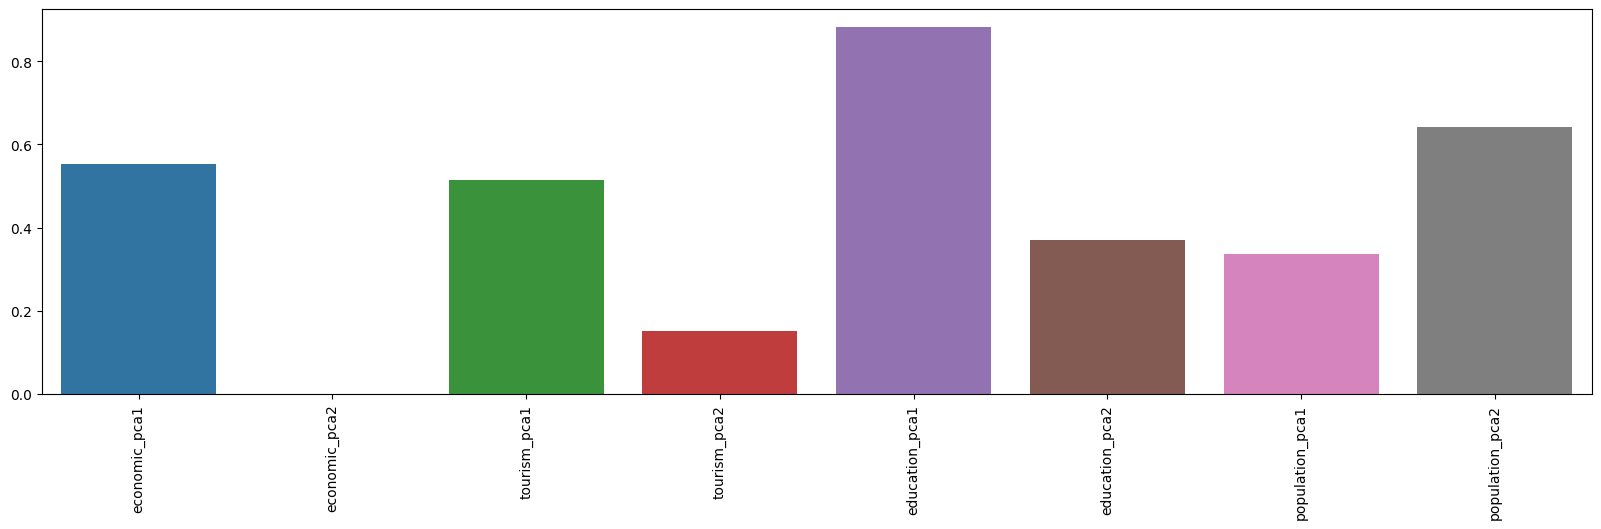

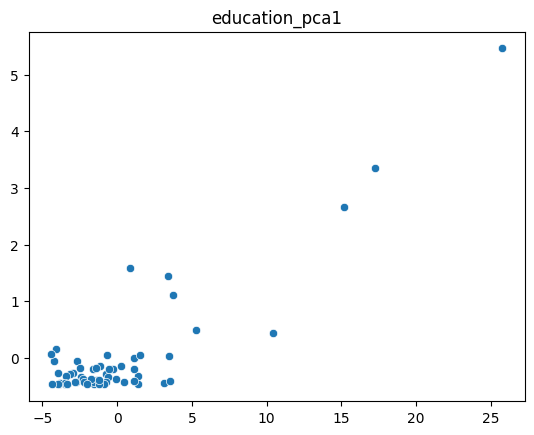

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_coefs = []
for idx in range(len(categories_cols)):
    corr = np.abs(np.corrcoef(data_pca_X[:, idx], data_y)[0, 1])
    if(pd.isnull(corr)):
        corr = 0
    corr_coefs.append(corr)
print('Coefficients: ', corr_coefs)
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.barplot(x = categories_cols, y = corr_coefs, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()
sns.scatterplot(x = data_pca_X[:, np.argmax(corr_coefs)], y = data_y)
plt.title(categories_cols[np.argmax(corr_coefs)])
plt.show()

In [45]:
all_idx = np.arange(data_pca_X.shape[0])
np.random.shuffle(all_idx)
train_test_split_idx = int(data_pca_X.shape[0] * 0.8)
train_idx = all_idx[:train_test_split_idx]
test_idx = all_idx[train_test_split_idx:]

In [46]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(data_pca_X[train_idx, :], data_y[train_idx])

LinearRegression()

Coefficients:  [ 2.90156410e-01  3.46944695e-17 -2.23467300e-02 -2.80649652e-02
 -7.90428281e-02 -3.15407788e-01  3.51337865e-01  2.08960094e-01]


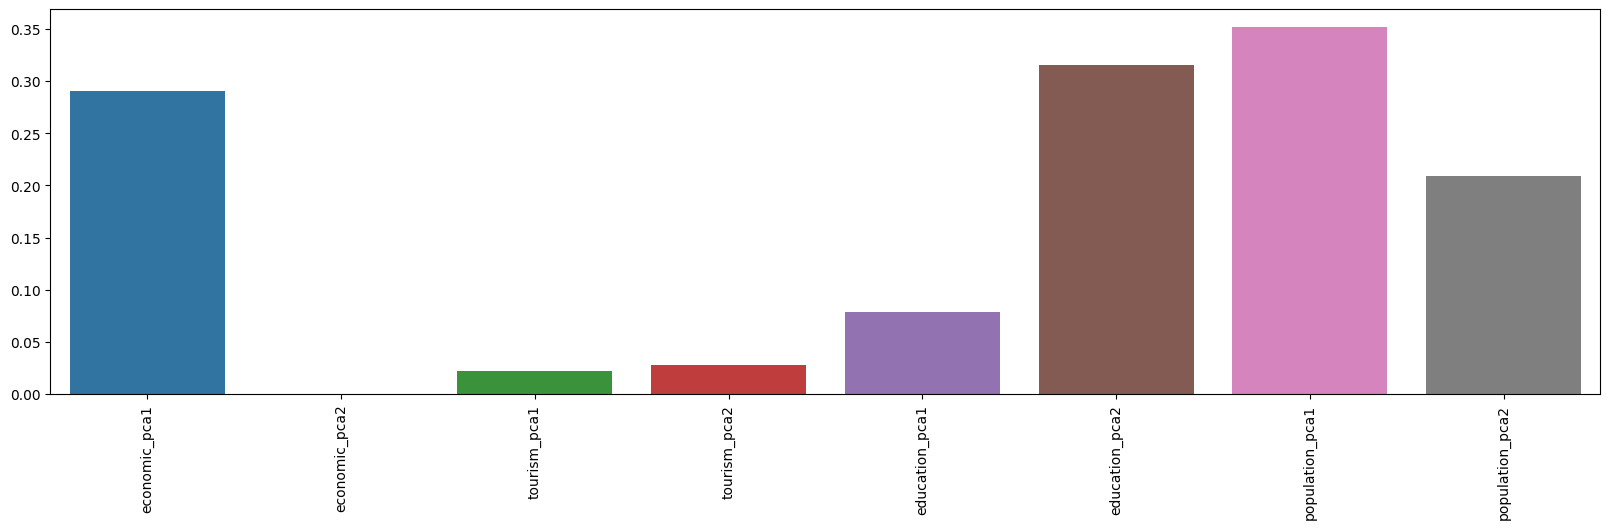

In [47]:
model_coefs = model.coef_
print('Coefficients: ', model_coefs)
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.barplot(x = categories_cols, y = np.abs(model_coefs), ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

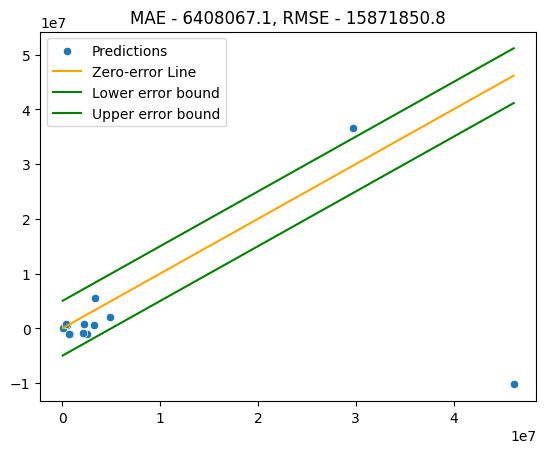

In [48]:
from sklearn import metrics
target_mean = cols_standardization_vals[target_feature[0]]['mean']
target_std = cols_standardization_vals[target_feature[0]]['std']
true = data_y[test_idx] * target_std + target_mean
pred = model.predict(data_pca_X[test_idx, :]) * target_std + target_mean
mae = metrics.mean_absolute_error(true, pred)
rmse = np.sqrt(metrics.mean_squared_error(true, pred))
sns.scatterplot(x = true, y = pred, label = 'Predictions')
sns.lineplot(x = true, y = true, label = 'Zero-error Line', color = 'orange')
sns.lineplot(x = true, y = true - 5e6, label = 'Lower error bound', color = 'green')
sns.lineplot(x = true, y = true + 5e6, label = 'Upper error bound', color = 'green')
plt.legend(loc = 'best')
plt.title(f"MAE - {mae:.1f}, RMSE - {rmse:.1f}")
plt.show()

In [49]:
categories_cols

['economic_pca1',
 'economic_pca2',
 'tourism_pca1',
 'tourism_pca2',
 'education_pca1',
 'education_pca2',
 'population_pca1',
 'population_pca2']

In [50]:
model = linear_model.LinearRegression()
model.fit(data_pca_X, data_y)
model_coefs = OrderedDict(zip(['intercept'] + categories_cols, [model.intercept_] + [*model.coef_]))

In [51]:
import json
with open(f'./PreProcessed_Datasets/Models/CitySelectionModel_coefs.json', 'w') as save_file:
    json.dump(model_coefs, save_file)